# Screenshot To Code
REF: [abi/screenshot-to-code](https://github.com/abi/screenshot-to-code)

In [3]:
import openai
import os
from dotenv import load_dotenv

load_dotenv(verbose=True)

openai.api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI()

In [4]:
def chat_completions(messages):
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=messages,
        max_tokens=4096,
        temperature=0
    )
    return response

In [1]:
SYSTEM_PROMPT = """
You are an expert Tailwind developer
You take screenshots of a reference web page from the user, and then build single page apps 
using Tailwind, HTML and JS.
You might also be given a screenshot of a web page that you have already built, and asked to
update it to look more like the reference image.

- Make sure the app looks exactly like the screenshot.
- Pay close attention to background color, text color, font size, font family, 
padding, margin, border, etc. Match the colors and sizes exactly.
- Use the exact text from the screenshot.
- Do not add comments in the code such as "<!-- Add other navigation links as needed -->" and "<!-- ... other news items ... -->" in place of writing the full code. WRITE THE FULL CODE.
- Repeat elements as needed to match the screenshot. For example, if there are 15 items, the code should have 15 items. DO NOT LEAVE comments like "<!-- Repeat for each news item -->" or bad things will happen.
- For images, use placeholder images from https://placehold.co and include a detailed description of the image in the alt text so that an image generation AI can generate the image later.

In terms of libraries,

- Use this script to include Tailwind: <script src="https://cdn.tailwindcss.com"></script>
- You can use Google Fonts
- Font Awesome for icons: <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css"></link>

Return only the full code in <html></html> tags.
Do not include markdown "```" or "```html" at the start or end.
"""

USER_PROMPT = """
Generate code for a web page that looks exactly like this.
"""


In [12]:
def assemble_prompt(base64_image):
    return [
        {"role": "system", "content": SYSTEM_PROMPT},
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url", 
                    "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
                },
                {
                    "type": "text",
                    "text": USER_PROMPT,
                },
            ],
        },
    ]

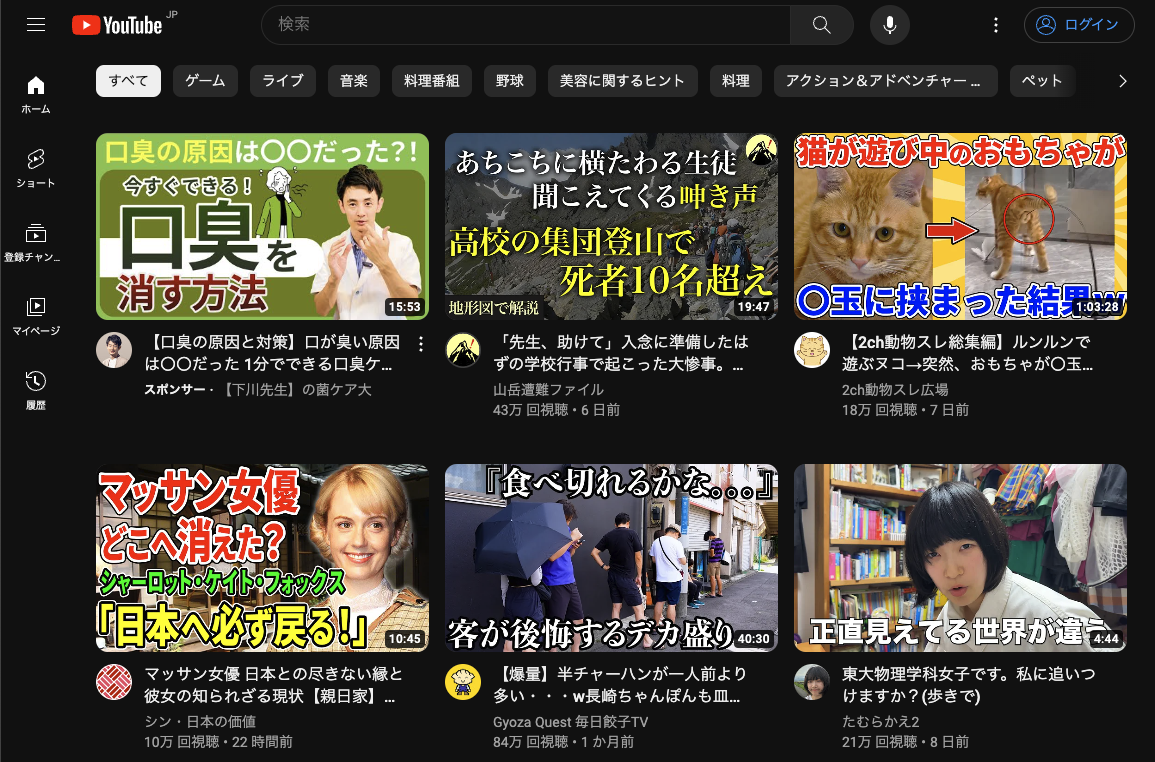

In [7]:
from PIL import Image

image_path = "./data/youtube_screenshot.png"
Image.open(image_path)

In [10]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [11]:
base64_image = encode_image(image_path)

In [14]:
prompt = assemble_prompt(base64_image)

In [18]:
response = chat_completions(prompt)
print(response)

ChatCompletion(id='chatcmpl-8M9DU0p7TkkbjNC1kte29xS3Wbwyi', choices=[Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content='<html lang="ja">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>YouTube</title>\n    <script src="https://cdn.tailwindcss.com"></script>\n    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css">\n    <style>\n        body {\n            font-family: \'Arial\', sans-serif;\n        }\n    </style>\n</head>\n<body class="bg-gray-900 text-white">\n    <div class="container mx-auto px-4">\n        <div class="grid grid-cols-3 gap-4">\n            <!-- First Column -->\n            <div class="space-y-4">\n                <div class="bg-green-600 p-4">\n                    <img src="https://placehold.co/200x150" alt="Thumbnail of a man with text overlay discussing a topic in Japanese" class="mb-2">\n                    <p

In [21]:
# write to file
with open("./output/youtube_screenshot.html", "w") as f:
    f.write(response.choices[0].message.content)

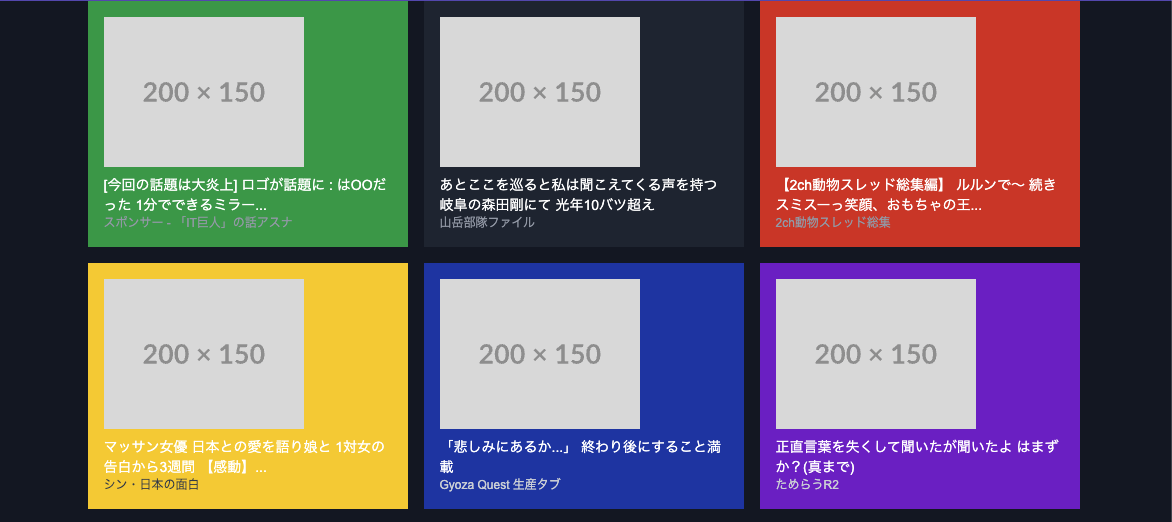

In [23]:
Image.open("./output/youtube_screenshot_html.png")